In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
credit=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv')
credit

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee
5,unknown,36,repaid,education,9055,unknown,1 - 4 yrs,2,single male,none,...,unknown/none,35,none,for free,1,1,2,yes,yes,unskilled resident
6,unknown,24,repaid,furniture,2835,501 - 1000 DM,> 7 yrs,3,single male,none,...,building society savings,53,none,own,1,1,1,none,yes,skilled employee
7,1 - 200 DM,36,repaid,car (used),6948,< 100 DM,1 - 4 yrs,2,single male,none,...,other,35,none,rent,1,1,1,yes,yes,mangement self-employed
8,unknown,12,repaid,radio/tv,3059,> 1000 DM,4 - 7 yrs,2,divorced male,none,...,real estate,61,none,own,1,1,1,none,yes,unskilled resident
9,1 - 200 DM,30,critical,car (new),5234,< 100 DM,unemployed,4,married male,none,...,other,28,none,own,2,2,1,none,yes,mangement self-employed


In [4]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [6]:
credit_dummies=pd.get_dummies(credit.drop('default',axis=1))
credit_dummies['default']=credit['default']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train,test=train_test_split(credit_dummies,random_state=100,test_size=0.3)

In [11]:
train_x=train.drop('default',axis=1)
train_y=train['default']
print(train_x)
print(train_y)

     months_loan_duration  amount  installment_rate  residence_history  age  \
420                    15    3186                 2                  3   20   
278                     6    4611                 1                  4   32   
218                    24    3021                 2                  2   24   
363                     6    1766                 1                  2   21   
850                    20    2235                 4                  2   33   
111                    15     392                 4                  4   23   
479                    15    1478                 4                  4   44   
105                    24   11938                 2                  3   39   
539                    18    3049                 1                  1   45   
320                    30    4249                 4                  2   28   
511                    36    4686                 2                  2   32   
69                     36    2394                 4 

In [16]:
test_x=test.drop('default',axis=1)
test_y=test['default']
print(test_x)
print(test_y)

     months_loan_duration  amount  installment_rate  residence_history  age  \
249                    18     433                 3                  4   22   
353                    12    6199                 4                  2   28   
537                    18    3612                 3                  4   37   
424                    12    2762                 1                  2   25   
564                    24    4712                 4                  2   37   
124                    18    1924                 4                  3   27   
492                     6    1237                 1                  1   27   
553                    12    1995                 4                  1   27   
982                    21    2923                 1                  1   28   
935                    30    1919                 4                  3   30   
633                     9    1980                 2                  2   19   
771                    36    8065                 3 

# DECISION TREE MODEL WITH GRIDSEARCH CV

In [28]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(1,30))}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,
                       param_grid=params,
                       cv=10)
cv_model.fit(train_x, train_y)
cv_model.best_params_


{'max_depth': 4}

In [30]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=100,max_depth=4)
model.fit(train_x,train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [31]:
predict=model.predict(test_x)
pred_results=pd.DataFrame({'actual':test_y,'predicted':predict})

In [32]:
#true negative
tn1=pred_results[(pred_results.predicted==2) &
            (pred_results.actual==2)].shape[0]


# true positive
tp1=pred_results[(pred_results.predicted==1) &
            (pred_results.actual==1)].shape[0]


# false positive
fp1=pred_results[(pred_results.predicted==1) &
            (pred_results.actual==2)].shape[0]


#false negative
fn1=pred_results[(pred_results.predicted==2) &
            (pred_results.actual==1)].shape[0]

tn1,tp1,fp1,fn1

(32, 177, 49, 42)

In [33]:
accu=(tn1+tp1)/(tn1+tp1+fp1+fn1)
sensi=tp1/(tp1+fn1)
speci=tn1/(tn1+fp1)

accu,sensi,speci


(0.6966666666666667, 0.8082191780821918, 0.3950617283950617)

# ROC OF DECISION TREE

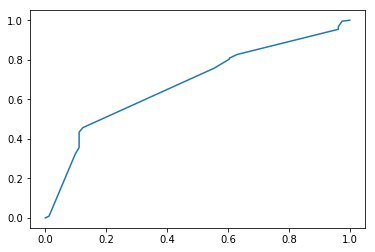

In [105]:
from sklearn.metrics import roc_curve

pred_probs_dt = pd.DataFrame(model.predict_proba(test_x),columns=['Not default','Default'])
fp1,tp1,thr_dt = roc_curve(test_y,pred_probs_dt['Not default'],pos_label=1)
plt.plot(fp1,tp1)
plt.show()


# RANDOM FOREST MODEL

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
model1=RandomForestClassifier(random_state=100,n_estimators=300)
model1.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [38]:
predict1=model1.predict(test_x)
pred_results1=pd.DataFrame({'actual':test_y,'predicted':predict1})

In [39]:
#true negative
tn2=pred_results1[(pred_results1.predicted==2) &
            (pred_results1.actual==2)].shape[0]


# true positive
tp2=pred_results1[(pred_results1.predicted==1) &
            (pred_results1.actual==1)].shape[0]


# false positive
fp2=pred_results1[(pred_results1.predicted==1) &
            (pred_results1.actual==2)].shape[0]


#false negative
fn2=pred_results1[(pred_results1.predicted==2) &
            (pred_results1.actual==1)].shape[0]

tn2,tp2,fp2,fn2

(27, 193, 54, 26)

In [40]:
accu1=(tn2+tp2)/(tn2+tp2+fp2+fn2)
sensi1=tp2/(tp2+fn2)
speci1=tn2/(tn2+fp2)

accu1,sensi1,speci1


(0.7333333333333333, 0.8812785388127854, 0.3333333333333333)

# ROC OF RANDOM FOREST

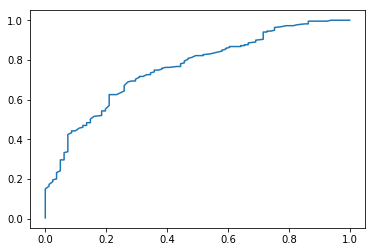

In [106]:
pred_probs_dt = pd.DataFrame(model1.predict_proba(test_x),columns=['Not default','Default'])
fp2,tp2,thr_dt = roc_curve(test_y,pred_probs_dt['Not default'],pos_label=1)
plt.plot(fp2,tp2)
plt.show()



# ADA BOOST

In [46]:
from sklearn.ensemble import AdaBoostClassifier

In [51]:
model2=AdaBoostClassifier(random_state=100,n_estimators=300)
model2.fit(train_x,train_y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=100)

In [52]:
pred_3=model2.predict(test_x)
pred_results2=pd.DataFrame({'actual':test_y,'predicted':pred_3})

In [53]:
#true negative
tn3=pred_results2[(pred_results2.predicted==2) &
            (pred_results2.actual==2)].shape[0]


# true positive
tp3=pred_results2[(pred_results2.predicted==1) &
            (pred_results2.actual==1)].shape[0]


# false positive
fp3=pred_results2[(pred_results2.predicted==1) &
            (pred_results2.actual==2)].shape[0]


#false negative
fn3=pred_results2[(pred_results2.predicted==2) &
            (pred_results2.actual==1)].shape[0]

tn3,tp3,fp3,fn3

(30, 178, 51, 41)

In [54]:
accu2=(tn3+tp3)/(tn3+tp3+fp3+fn3)
sensi2=tp3/(tp3+fn3)
speci2=tn3/(tn3+fp3)

accu2,sensi2,speci2

(0.6933333333333334, 0.8127853881278538, 0.37037037037037035)

# ROC OF ADA BOOST

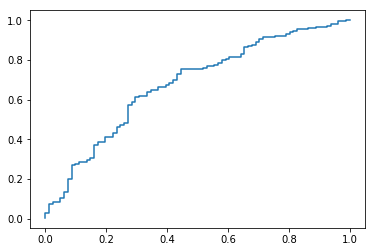

In [107]:
pred_probs_dt = pd.DataFrame(model2.predict_proba(test_x),columns=['Not default','Default'])
fp3,tp3,thr_dt = roc_curve(test_y,pred_probs_dt['Not default'],pos_label=1)
plt.plot(fp3,tp3)
plt.show()

# KNN CLASSIFICATION

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
model3=KNeighborsClassifier(n_neighbors=5)
model3.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [59]:
pred_4=model3.predict(test_x)
pred_results3=pd.DataFrame({'actual':test_y,'predicted':pred_4})

In [60]:
#true negative
tn4=pred_results3[(pred_results3.predicted==2) &
            (pred_results3.actual==2)].shape[0]


# true positive
tp4=pred_results3[(pred_results3.predicted==1) &
            (pred_results3.actual==1)].shape[0]


# false positive
fp4=pred_results3[(pred_results3.predicted==1) &
            (pred_results3.actual==2)].shape[0]


#false negative
fn4=pred_results3[(pred_results3.predicted==1) &
            (pred_results3.actual==2)].shape[0]

tn4,tp4,fp4,fn4

(19, 184, 62, 62)

In [61]:
accu3=(tn4+tp4)/(tn4+tp4+fp4+fn4)
sensi3=tp4/(tp4+fn4)
speci3=tn4/(tn4+fp4)

accu3,sensi3,speci3


(0.6207951070336392, 0.7479674796747967, 0.2345679012345679)

# ROC OF KNN

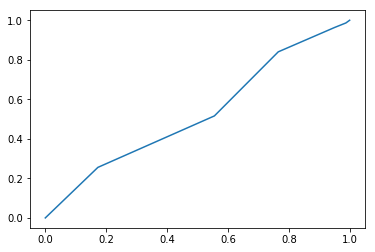

In [108]:
pred_probs_dt = pd.DataFrame(model3.predict_proba(test_x),columns=['Not default','Default'])
fp4,tp4,thr_dt = roc_curve(test_y,pred_probs_dt['Not default'],pos_label=1)
plt.plot(fp4,tp4)
plt.show()


# NAIVE BAYES

In [69]:
from sklearn.naive_bayes import GaussianNB

In [70]:
model14=GaussianNB()
model14.fit(train_x,train_y)


GaussianNB(priors=None)

In [71]:
pred_5=model14.predict(test_x)
pred_results4=pd.DataFrame({'actual':test_y,'predicted':pred_5})


In [72]:
#true negative
tn5=pred_results4[(pred_results4.predicted==2) &
            (pred_results4.actual==2)].shape[0]


# true positive
tp5=pred_results4[(pred_results4.predicted==1) &
            (pred_results4.actual==1)].shape[0]


# false positive
fp5=pred_results4[(pred_results4.predicted==1) &
            (pred_results3.actual==2)].shape[0]


#false negative
fn5=pred_results4[(pred_results4.predicted==1) &
            (pred_results4.actual==2)].shape[0]

tn5,tp5,fp5,fn5



(44, 161, 37, 37)

In [74]:
accu4=(tn5+tp5)/(tn5+tp5+fp5+fn5)
sensi4=tp5/(tp5+fn5)
speci4=tn5/(tn5+fp5)

accu4,sensi4,speci4


(0.7347670250896058, 0.8131313131313131, 0.5432098765432098)

# ROC OF NAIVE BAYES

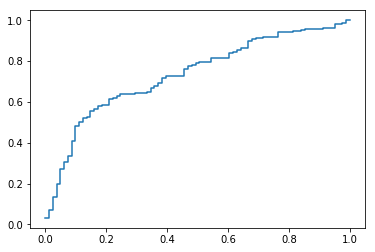

In [110]:
pred_probs_dt = pd.DataFrame(model14.predict_proba(test_x),columns=['Not default','Default'])
fp5,tp5,thr_dt = roc_curve(test_y,pred_probs_dt['Not default'],pos_label=1)
plt.plot(fp5,tp5)
plt.show()


In [75]:
final_ans={'Decision Tree':pd.Series([tn1,tp1,fp1,fn1,accu,sensi,speci],index=['True Negative','True Positive','False Positive','False Negative','Accuracy','Sensitivity','Specificity']),
           'Random Forest':pd.Series([tn2,tp2,fp2,fn2,accu1,sensi1,speci1],index=['True Negative','True Positive','False Positive','False Negative','Accuracy','Sensitivity','Specificity']),
           'Adaptive Boosting':pd.Series([tn3,tp3,fp3,fn3,accu2,sensi2,speci2],index=['True Negative','True Positive','False Positive','False Negative','Accuracy','Sensitivity','Specificity']),
           'KNN Classification':pd.Series([tn4,tp4,fp4,fn4,accu3,sensi3,speci3],index=['True Negative','True Positive','False Positive','False Negative','Accuracy','Sensitivity','Specificity']),
          'NAIVE BAYES':pd.Series([tn5,tp5,fp5,fn5,accu4,sensi4,speci4],index=['True Negative','True Positive','False Positive','False Negative','Accuracy','Sensitivity','Specificity'])}

In [76]:
df_final=pd.DataFrame(final_ans)
df_final

,Adaptive Boosting,Decision Tree,KNN Classification,NAIVE BAYES,Random Forest
True Negative,30.000000,32.000000,19.000000,44.000000,27.000000
True Positive,178.000000,177.000000,184.000000,161.000000,193.000000
False Positive,51.000000,49.000000,62.000000,37.000000,54.000000
False Negative,41.000000,42.000000,62.000000,37.000000,26.000000
Accuracy,0.693333,0.696667,0.620795,0.734767,0.733333
Sensitivity,0.812785,0.808219,0.747967,0.813131,0.881279
Specificity,0.370370,0.395062,0.234568,0.543210,0.333333


# AUC CURVES

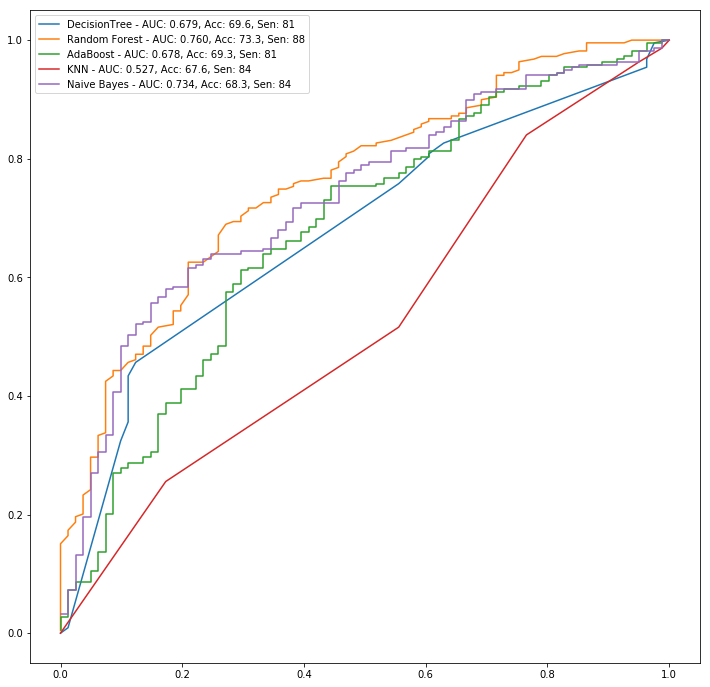

In [114]:
from sklearn.metrics import auc
plt.figure(figsize=(12,12))


auc_dt = auc(fp1,tp1)

auc_rf = auc(fp2,tp2)

auc_ab = auc(fp3,tp3)

auc_knn = auc(fp4,tp4)

auc_nb = auc(fp5,tp5)

plt.plot(fp1,tp1)

plt.plot(fp2,tp2)

plt.plot(fp3,tp3)

plt.plot(fp4,tp4)

plt.plot(fp5,tp5)

plt.legend(['DecisionTree - AUC: %.3f, Acc: 69.6, Sen: 81' % auc_dt,

           'Random Forest - AUC: %.3f, Acc: 73.3, Sen: 88' % auc_rf,

           'AdaBoost - AUC: %.3f, Acc: 69.3, Sen: 81' % auc_ab,

           'KNN - AUC: %.3f, Acc: 67.6, Sen: 84' % auc_knn,

           'Naive Bayes - AUC: %.3f, Acc: 68.3, Sen: 84' % auc_nb])

# Naive bayes is the most appropriate model we will be choosing